THE PURPOSE OF THIS NOTEBOOK IS TO 
ENCAPSULATE MANY OF THE FUNCTIONS CREATED BY SANJANA TULE 
INTO A PYTHON FILE AND CALL THOSE FUNCTIONS IN THIS NOTEBOOK 
TO GIVE A VERY CLEAN CODE IMPLEMENTATION

IN ADDITION TO THIS PYTHON FUNCTIONS ARE ALSO ADDED TO GET
THE SPEED LIMIT RISK FACTOR AND PLOT IT

THE PYTHON FILE USED FOR THIS IS THE SiliconValleyHelperFunctions.py

Created by - Hussain Ravat
Date - 08/09/2021

In [1]:
# Installing Libraries
!pip install osmnx
!apt install python3-rtree

     |████████████████████████████████| 93 kB 1.9 MB/s 
     |████████████████████████████████| 6.3 MB 61.9 MB/s 
     |████████████████████████████████| 994 kB 92.6 MB/s 
     |████████████████████████████████| 994 kB 76.7 MB/s 
     |████████████████████████████████| 62 kB 711 kB/s 
     |████████████████████████████████| 10.3 MB 59.1 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompat

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 40 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg-resources all 39.0.1-2 [98.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 k

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing libraries
import matplotlib.pyplot as plt
import osmnx as ox
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from scipy.ndimage import distance_transform_edt
import pandas as pd
import itertools
import matplotlib
import networkx as nx
import folium
import statistics
from sklearn.preprocessing import LabelEncoder
import matplotlib.colors as colors
import matplotlib.cm as cmx
import sys
import os
import PIL 

In [12]:
# The path where the python File is stored
py_file_location = "/content/drive/MyDrive/Silicon Valley Earthquake Challenge"
sys.path.append(os.path.abspath(py_file_location))

In [13]:
# Reload the file automatically so that latest changes are pulled in
%load_ext autoreload 
import EQRiskAssesmentHelperFunctions
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
help(EQRiskAssesmentHelperFunctions)

Help on module EQRiskAssesmentHelperFunctions:

NAME
    EQRiskAssesmentHelperFunctions - # importing libraries

FUNCTIONS
    BuildingDensityCalculator(block_name, edges)
        This proc adds building densities to the dataframe.
        The master files for the are preperared using QGIS tool
    
    CalcualteDistanceTransform(block_name)
        This code is developed by Snajana Tule
        Here we are collacting all the steps necessary to add DistanceRiskScore to the matrix
    
    EdgesExtended(block_name, edges, distance)
        This procedure was developed by Sanajana Tule
        It takes in block name,distance,edges as arguments 
        It returns the Extended Edges dataframe
    
    Line_to_list_lonlats(geom, summary, lon_index, lat_index)
        Function developed by Sanjana Tule
    
    MaxSpeedRiskScoreCalculator(master_file_path, edge)
        This function takes in the path of the Speed Limit Master File and imputes missing 
        values in the Edge dataframe
 

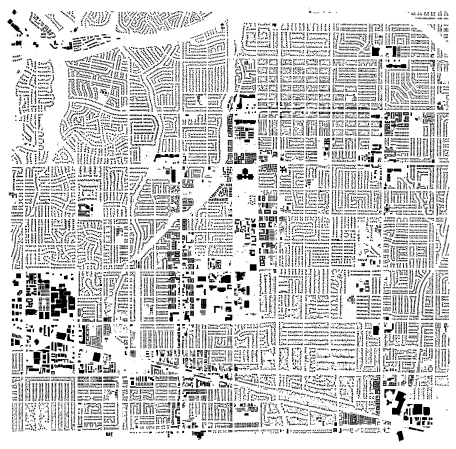

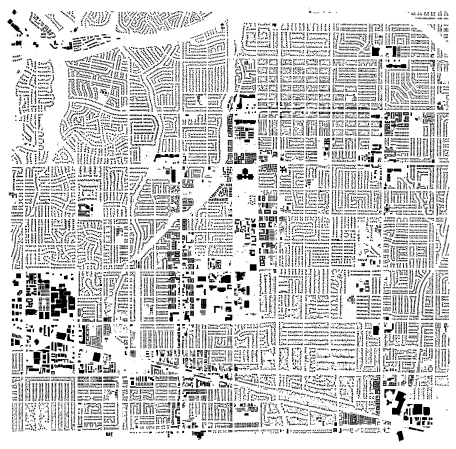

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/networkx/utils/decorators.py:5: DeprecationWarning: write_gpickle is deprecated and will be removed in 3.0.Use ``pickle.dump(G, path, protocol)``
  import warnings


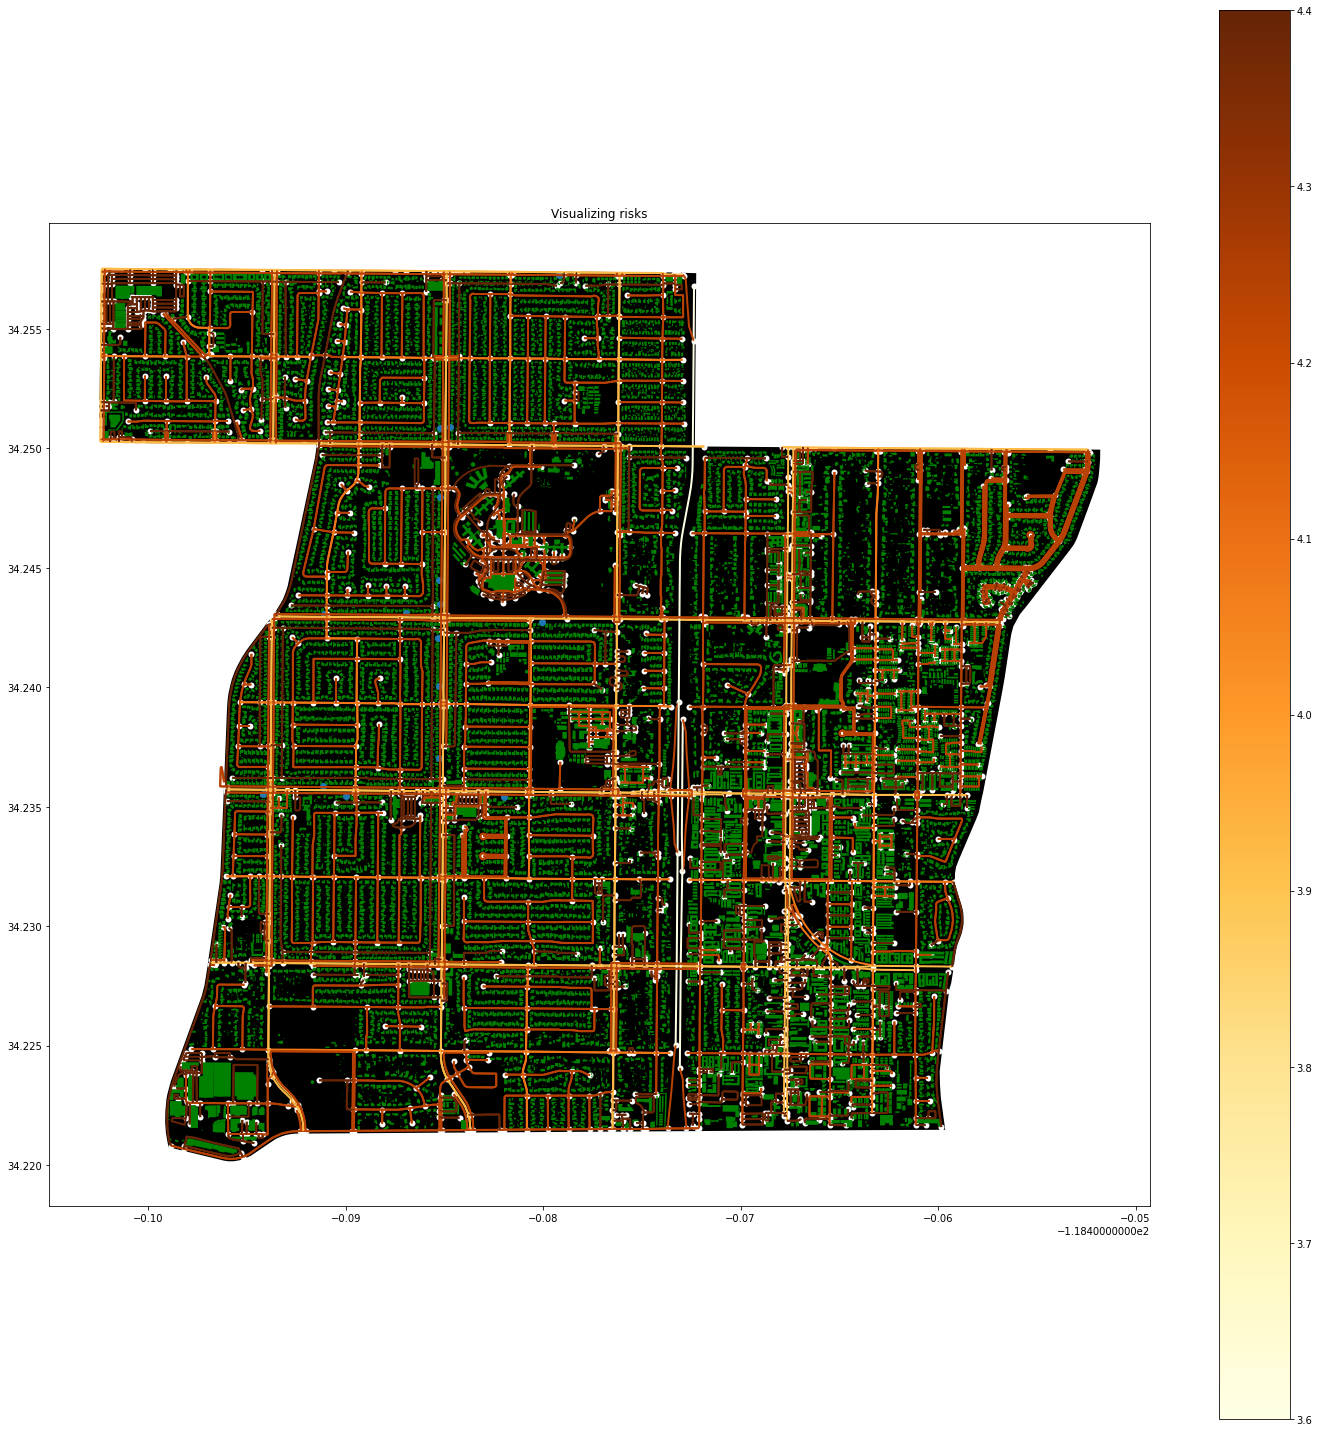

In [16]:
# The names list is given here 
# We are simply calling the necessary functions for the same
# Please refer the above cell for a brief description of the functions used

# names_list= Names of the neighbourhood for which we need to do processing
names_list=['North Hills'] 

#speed_master_file_path=The file path where the speed limit master file is generated
speed_master_file_path='/content/drive/MyDrive/Silicon Valley Earthquake Challenge/'

#speed_master_file_path_2=This is the path where the Speed Limit Mster File is stored
# It is used in MaxSpeedRiskScoreCalculator to impute missing values 
speed_master_file_path_2 = '/content/drive/MyDrive/Silicon Valley Earthquake Challenge/SPEED_LIMIT_MASTER.CSV'

#This is the file path where the pickle file will be saved
file_path='/content/drive/MyDrive/Silicon Valley Earthquake Challenge/'

#Speed Limit Graph Path
speed_limit_graph_path='/content/drive/MyDrive/Silicon Valley Earthquake Challenge/speed limit graphs/'

for name in names_list:
  nodes,edges=EQRiskAssesmentHelperFunctions.block_to_shape(name)
  distance= EQRiskAssesmentHelperFunctions.CalcualteDistanceTransform('Northridge')
  edges_extended = EQRiskAssesmentHelperFunctions.EdgesExtended(name,edges,distance)
  edges_extended=EQRiskAssesmentHelperFunctions.SpeedLimitColumnFormatter(edges_extended)
  #BELOW IS ONE TIME ONLY
  #EQRiskAssesmentHelperFunctions.SpeedMasterFileGenerator(speed_master_file_path,edges_extended)
  edges_extended=EQRiskAssesmentHelperFunctions.MaxSpeedRiskScoreCalculator(speed_master_file_path_2,edges_extended)
  edges['max_speed_risk_score'] = edges_extended['max_speed_risk_score'].values
  edges=EQRiskAssesmentHelperFunctions.BuildingDensityCalculator(name,edges)
  EQRiskAssesmentHelperFunctions.SaveToPicke(file_path,name+'.pickle',edges,nodes)
  EQRiskAssesmentHelperFunctions.RiskFactorGraph(name,edges,nodes,speed_limit_graph_path,'max_speed_risk_score')


# SCRATCH 

The notebook ends here and everythin below this has been deleted at it was only used for testing purposes